---
title: 'Chapter 4: Morphological operations'
jupyter: python3
format:
  html:
    embed-resources: true
  pdf:
    documentclass: article
    toc: true
    fontsize: 12pt
    geometry:
      - top=1in
      - bottom=1in
      - left=1in
      - right=1in
      - heightrounded
---

# Introduction

After binary thresholding an image to retain just the desired objects in the
foreground, these images usually contain undesirable artifacts. These could
small objects, objects of undesired shape, or an object separated into multiple
ones by small fissures.  Morphological operations on a binary image is useful
to fix these issues. Morphological operations can also be combined to fill
holes or extract object boundaries in binary images.


# The fundamental morphological operations

The two fundamental morphological operations are erosion and dilation. These
are building blocks of number of other techniques that combine them in clever
ways.  Although morphological operations are applicable to both binary and
grayscale images, we will focus only on binary images.

## Structuring element
The key component for a morphological operation in a structuring element. A
structuring element is a identical to a kernel (window) that we used for image
smoothing.  A structural element is a (small) binary image where the foreground
pixels are of a desired shape. As examples, we can have rectangle or elliptical
shaped structural elements:

Text(0.5, 1.0, '10x5 ellipse')

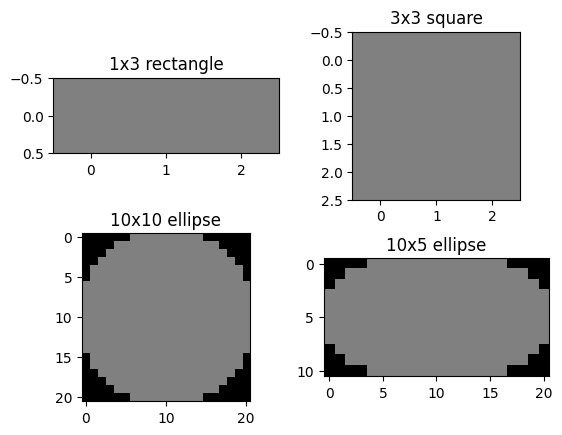

In [54]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

## For skimage version 0.25 onward
# A rectangle structuring element
rect_se = ski.morphology.footprint_rectangle((1, 3))

# A square structuring element
sq_se = ski.morphology.footprint_rectangle((3, 3))

# A circular structuring element or radius 10
circle_se = ski.morphology.ellipse(10, 10)

# A elliptical structuring element of width 10 and height 5
ellipse_se = ski.morphology.ellipse(10, 5)


## For older version of skimage
"""
rect_se = ski.morphology.rectangle(1, 3)
sq_se = ski.morphology.rectangle(3, 3)
circle_se = ski.morphology.disk(10)
ellipse_se = ski.morphology.disk(5)
"""

# Plot the SEs
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(rect_se, cmap = 'gray', vmin = 0, vmax = 2)
ax[0, 0].set_title('1x3 rectangle')
ax[0, 1].imshow(sq_se, cmap = 'gray', vmin = 0, vmax = 2)
ax[0, 1].set_title('3x3 square')
ax[1, 0].imshow(circle_se, cmap = 'gray', vmin = 0, vmax = 2)
ax[1, 0].set_title('10x10 ellipse')
ax[1, 1].imshow(ellipse_se, cmap = 'gray', vmin = 0, vmax = 2)
ax[1, 1].set_title('10x5 ellipse')

## Erosion
To erode an a binary image, we overlay the structuring element at each pixel of
the input image, and the output at that pixel is set to 1 if all the pixels in
the input image under the structuring element is 1.  The erosion operation is
useful to retain parts of the input image that "fits into" the structuring
element. For example, if we are using a square structuring element 2 pixels
wide, it will remove any rectangular objects in the input image that has width
less than 2, and all other objects will shirk in size. 

In [ ]:
# Create a binary figure
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the image with the structuring element
er = ski.morphology.binary_erosion(img, se)

# Plot the figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original image')
ax[1].imshow(er, cmap = 'gray')
ax[1].set_title('Eroded with 2x2 square')

## Dilation
Dilation is the inverse of an erosion. To dilate a binary image, we overlay the
structuring element at each pixel of the input image, the output at that pixel
is set to 1 if any pixel in the in the input image under the structuring
element is 1.  The dilation operation is useful to join fissures in the input
image that are smaller than the structuring element. For example, using a
square structuring element 2 pixels wide will join any objects in the input
image that are less than 2 pixels apart, and all other objects will expand.

In [ ]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Dilate the image with the structuring element
dil = ski.morphology.binary_dilation(img, se)

# Plot the figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original image')
ax[1].imshow(dil, cmap = 'gray')
ax[1].set_title('Dilated with 2x2 square')

# Combining erosion and dilation
Erosion and Dilation operations can be combined to create higher order
operations.  Morphological opening and closing are preforming an erosion and
dilation consecutively.  These operations in effect restore the "damage" done
by the other operation. 


## Morphological opening
Morphological opening first erodes an image and then dilates the eroded image.
As we have seen eroding an image removes objects smaller than the structuring
elements, and makes all other objects in the input image smaller. Dilating the
eroded image restores these smaller objects by making them bigger.
Importantly, the objects that were lost in the erosion are not restored.
In essence, we remove all objects smaller than the structuring element and all
other objects are restored. 

In [ ]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the input image
er = ski.morphology.binary_erosion(img, se)
# Dilate the eroded image
dil_er = ski.morphology.binary_dilation(er, se)

# The above two steps can be done in one step
opening = ski.morphology.opening(img, se)

# Plot the image
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(er, cmap = 'gray')
ax[0, 1].set_title('Eroded image')
ax[1, 0].imshow(dil_er, cmap = 'gray')
ax[1, 0].set_title('Dilation of erosion')
ax[1, 1].imshow(opening, cmap = 'gray')
ax[1, 1].set_title('Opening')
for a in ax.flatten():
    a.set_axis_off()

## Morphological closing
Morphological closing first dilates an image and then erodes the dilated image.
Dilating an image makes all objects bigger and objects that closer than
the structuring element are joined into one, and makes all other objects
larger. Eroding a dilated image restores the larger objects by making
them smaller. Importantly, the objects that were merged by the dilation will
remain merged. In effect, we connect objects that are closer than the
structuring element and all other objects are restored. 

In [ ]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a 2x2 square structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Dilate the input image
dil = ski.morphology.binary_dilation(img, se)
# Erode the dilated image
er_dil = ski.morphology.binary_erosion(dil, se)

# The above two steps can be done in one step
closing = ski.morphology.closing(img, se)

# Plot the image
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(dil, cmap = 'gray')
ax[0, 1].set_title('Dilated image')
ax[1, 0].imshow(er_dil, cmap = 'gray')
ax[1, 0].set_title('Erosion of dilation')
ax[1, 1].imshow(closing, cmap = 'gray')
ax[1, 1].set_title('Closing')
for a in ax.flatten():
    a.set_axis_off()

Note that for both opening and closing, the final image is not a prefect
reconstruction of the input image. 

# Iterative erosion and dilation
We can get to further higher order functions by iteratively applying these
operations. There are several of them, but let us look at three that come
in very handy when analyzing biological samples. 

## Hole filling
As the name suggests, this fills holes in in binary images. Holes in a binary
image are background pixels that are completely surrounded by foreground
pixels. A hole filling converts these background pixels into foreground
pixels. 

In [ ]:
from scipy import ndimage as ndi

# Load the cell images
# img = ski.io.imread("data/F01_202w1.TIF")
img = ski.data.coins()

# Covert it into a binary image with otsu thresholding
otsu_thresh = ski.filters.threshold_otsu(img)
img_otsu = img > otsu_thresh

# Fill in the holes
# This function is part of the scipy package.
hole_filled = ndi.binary_fill_holes(img_otsu)

# Plot the images
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original image')
ax[1].imshow(img_otsu, cmap = 'gray')
ax[1].set_title('Binary image')
ax[2].imshow(hole_filled, cmap = 'gray')
ax[2].set_title('Hole filled')
for a in ax:
    a.set_axis_off()

## Border extraction 
We can get the border of objects by dilating an image
with a 3x3 square structuring element to make all objects in the image one pixel
larger. We can then subtract the original image from the dilated image to retain
just the border pixels.

In [ ]:
img = ski.data.coins()

# create SE and dilate
se = ski.morphology.footprint_rectangle((3, 3))
dil = ski.morphology.binary_dilation(hole_filled, se)

# subtract from the dilated image
border = dil ^ hole_filled

fig, ax = plt.subplots(1, 3)
ax[0].imshow(hole_filled, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(dil, cmap='gray')
ax[1].set_title('Dilated image')
ax[2].imshow(border, cmap='gray')
ax[2].set_title('Object boundaries')
for a in ax:
    a.set_axis_off()

## Morphological reconstruction
As we have seen opening changes the shape of the objects in the input image,
and these can be quite problematic when we need to preserve the object shapes.
Morphological reconstruction is a way to preserve the shape of the of the
objects. It takes as input two images: the input binary image (usually referred
to as the mask image) and a seed image (sometimes referred to as the marker
image).  In the fist step the seed image in expanded by dilation.  However this
dilation is contained by the mask image, such that the dilation does not expand
to any pixels that is not a foreground pixel in the mask image.  This process
is repeated iteratively until there are no changes. 

In [ ]:
# Create a binary image
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 1, 0, 1, 1],
                [0, 1, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# Create a structuring element
se = ski.morphology.footprint_rectangle((2, 2))

# Erode the original image to use as seed
er = ski.morphology.binary_erosion(img, se)

# Reconstruct starting from the eroded image
# and using the original image as mask
reconst = ski.morphology.reconstruction(er, img)

# Opening of the original image for comparison
opening = ski.morphology.opening(img, se)

# Plot the images
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original (mask) image')
ax[0, 1].imshow(er, cmap = 'gray')
ax[0, 1].set_title('Marker/seed image')
ax[1, 0].imshow(reconst, cmap = 'gray')
ax[1, 0].set_title('Reconstructed image')
ax[1, 1].imshow(opening, cmap = 'gray')
ax[1, 1].set_title('Opened image')
for a in ax.flatten():
    a.set_axis_off()

## Skeletonization

Skeletonization iteratively erodes images to get a 1 pixel skeleton on an
image. It is useful for understanding the shape and orientation of objects in
an image. 

In [ ]:
from scipy import ndimage as ndi

# Load the image
img = ski.io.imread("data/F01_202w1.TIF")

# Binary threshold the image
img = img > ski.filters.threshold_otsu(img)

# Fill in the holes
img = ndi.binary_fill_holes(img)

# Get the skeletion of the filled image
img_skeleton = ski.morphology.skeletonize(img)

# Plot the image
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Binary image')
ax[1].imshow(img_skeleton, cmap = 'gray')
ax[1].set_title('Skeleton of image')
for a in ax:
    a.set_axis_off()